In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Documents\WPy64-31160\notebooks\Loan_Payback\train.csv")
df1=pd.read_csv(r"C:\Users\HP\Documents\WPy64-31160\notebooks\Loan_Payback\test.csv")

In [3]:
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [5]:
df.duplicated().sum()

0

# Exploratory data analysis(EDA)

In [6]:
df.describe(include="all")

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994,593994,593994,593994,593994,593994,593994.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,306175,288843,279606,450645,324695,58695,NaN
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,NaN,NaN,NaN,NaN,NaN,NaN,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,NaN,NaN,NaN,NaN,NaN,NaN,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [7]:
df["credit_score"]=df["credit_score"].astype("float")

In [8]:
num=df.select_dtypes("float")
correlation=num.corr()
correlation

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
annual_income,1.000000,0.000553,0.001509,-0.003407,-0.002507,0.006326
debt_to_income_ratio,0.000553,1.000000,-0.061617,-0.008236,0.030316,-0.335680
credit_score,0.001509,-0.061617,1.000000,-0.005761,-0.538335,0.234560
loan_amount,-0.003407,-0.008236,-0.005761,1.000000,-0.001174,-0.003762
interest_rate,-0.002507,0.030316,-0.538335,-0.001174,1.000000,-0.131184
loan_paid_back,0.006326,-0.335680,0.234560,-0.003762,-0.131184,1.000000


In [9]:
pd.pivot_table(data=df, index=["gender"], values=["loan_paid_back"], aggfunc=["mean"])

,mean
,loan_paid_back
gender,
Female,0.801708
Male,0.795752
Other,0.795333


Les femmes sont plus solvables que les hommes.

In [10]:
pd.pivot_table(data=df, index=["marital_status"], values=["loan_paid_back"], aggfunc=["mean"])

,mean
,loan_paid_back
marital_status,
Divorced,0.796640
Married,0.799144
Single,0.798873
Widowed,0.789848


Les marriés sont plus solvables.

In [11]:
pd.pivot_table(data=df, index=[ "education_level"], values=["loan_paid_back"], aggfunc=["mean"])

,mean
,loan_paid_back
education_level,
Bachelor's,0.788892
High School,0.809698
Master's,0.802346
Other,0.802789
PhD,0.830067


les docteurs sont les plus solvables

In [12]:
pd.pivot_table(data=df, index=["loan_purpose"], values=["loan_paid_back"], aggfunc=["mean"])

,mean
,loan_paid_back
loan_purpose,
Business,0.813104
Car,0.800630
Debt consolidation,0.796911
Education,0.777053
Home,0.823224
Medical,0.778085
Other,0.802377
Vacation,0.796071


les personnes ayant pour objectif d'acheter une maison sont plus solvables

# MACHINE LEARNING MODELING

### XGBOOST CLASSIFIER

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, roc_auc_score

In [14]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

x=df[["employment_status","interest_rate","education_level"]]
y=df["loan_paid_back"]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
pipe = Pipeline([
    ("te", ce.TargetEncoder(
        cols=["employment_status", "education_level"],
        smoothing=10
    )),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        random_state=42
    ))
])

pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)

y_prob = pipe.predict_proba(x_test)[:, 1]

In [15]:
accuracy_score(y_test, y_pred)

0.897002500021044

In [16]:
roc_auc_score(y_test, y_prob)

0.830035023848386

In [17]:
x_new = df1[["employment_status", "interest_rate", "education_level"]]
df1["loan_paid_back"] = pipe.predict_proba(x_new)[:,1]

In [18]:
Submissions=df1[["id","loan_paid_back"]]
Submissions.to_csv(r"C:\Users\HP\Documents\WPy64-31160\notebooks\Loan Payback\submission.csv",index=False)

In [19]:
pipe.score(x,y)

0.8973676501782847

In [20]:
model=pipe.named_steps['model']
importances=model.feature_importances_

In [21]:
features_names=pipe.named_steps['te'].get_feature_names_out()

In [22]:
features_names

array(['employment_status', 'interest_rate', 'education_level'],
      dtype=object)

In [23]:
importances

array([0.97361165, 0.02307125, 0.00331705], dtype=float32)

In [24]:
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [25]:
feature_importance_df

,Feature,Importance
0,employment_status,0.973612
1,interest_rate,0.023071
2,education_level,0.003317


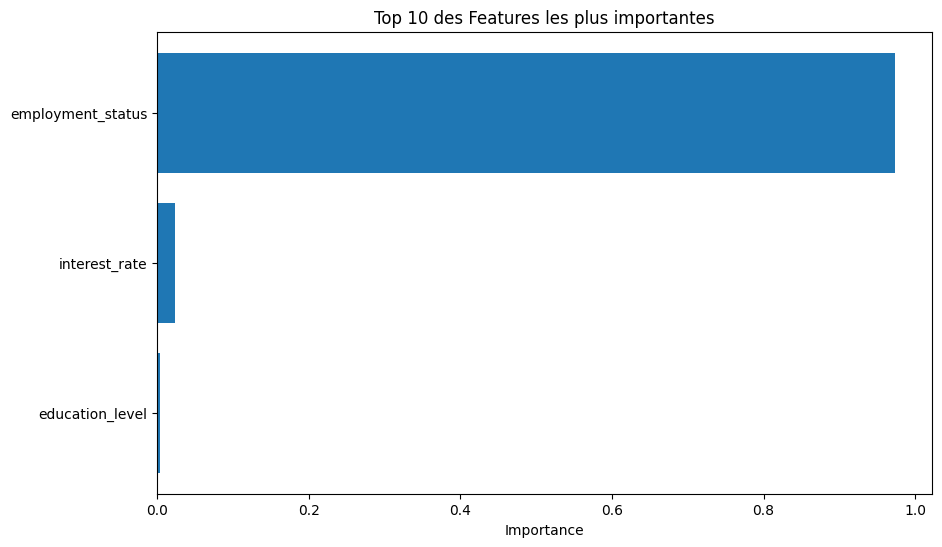

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:3], feature_importance_df['Importance'][:3])
plt.xlabel('Importance')
plt.title('Top 10 des Features les plus importantes')
plt.gca().invert_yaxis()
plt.show()

In [27]:
pip install streamlit

^C
Note: you may need to restart the kernel to use updated packages.


# CREATION DE L'INTERFACE STREAMLIT